In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)

df = pd.DataFrame()

df['x1'] = x.reshape(100)
df['x2'] = y.reshape(100)
df['y'] = z.reshape(100)

df

,x1,x2,y
0,-2.239796,2.660558,14.882607
1,0.716207,0.485574,2.094974
2,-2.520160,2.535030,13.079460
3,1.668515,3.663620,20.110416
4,3.506175,4.106910,34.205302
...,...,...,...
95,1.720352,-0.860078,5.353207
96,0.478537,2.597041,7.830729
97,-2.248542,1.840701,11.070154
98,2.635776,1.293234,11.962479


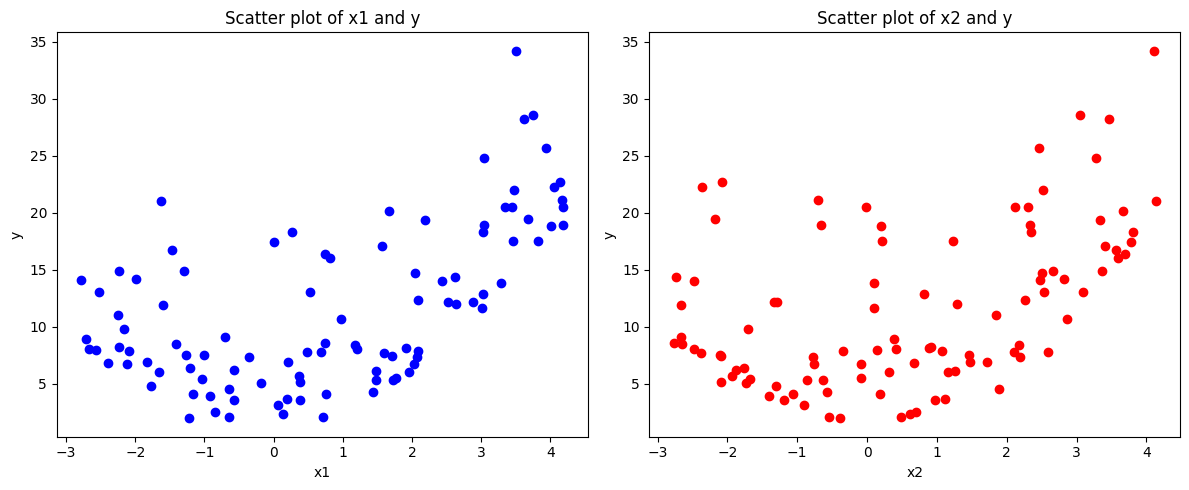

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot x1 and y
ax1.scatter(df['x1'], df['y'], color='blue')
ax1.set_title('Scatter plot of x1 and y')
ax1.set_xlabel('x1')
ax1.set_ylabel('y')

# Plot x2 and y
ax2.scatter(df['x2'], df['y'], color='red')
ax2.set_title('Scatter plot of x2 and y')
ax2.set_xlabel('x2')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()

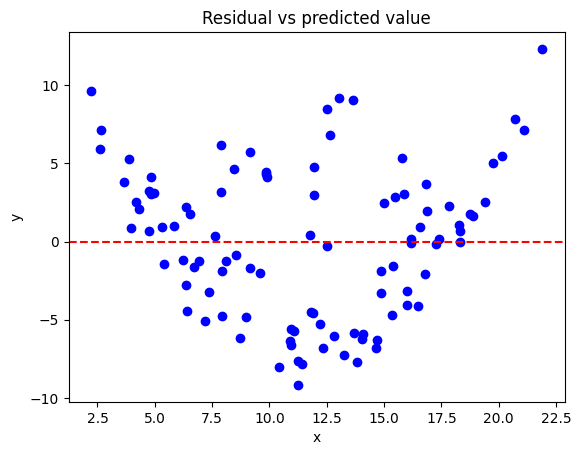

In [7]:
# Fit a linear regression model
X = df[['x1', 'x2']]
y = df['y']

model=LinearRegression()
model.fit(X,y)
y_pred=model.predict(X)
residuals=y-y_pred

plt.scatter(y_pred,residuals,color='blue')
plt.axhline(y=0,color='red',linestyle='--')
plt.title("Residual vs predicted value")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)
linear_y_pred=linear_model.predict(x_test)

linear_r2 = r2_score(y_test, linear_y_pred)
linear_mse = mean_squared_error(y_test, linear_y_pred)


# Calculate metrics for linear model
linear_r2 = r2_score(y_test, linear_y_pred)
linear_mse = mean_squared_error(y_test, linear_y_pred)


In [12]:
# Fit a polynomial model
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(x_train)
X_test_poly = poly_features.transform(x_test)


poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_y_pred = poly_model.predict(X_test_poly)


# Calculate metrics for polynomial model
poly_r2 = r2_score(y_test, poly_y_pred)
poly_mse = mean_squared_error(y_test, poly_y_pred)

# Compare model performance
print("Linear model")
print(f"R-squared: {linear_r2:.4f}")
print(f"Mean Squared Error: {linear_mse:.4f}")

print("\nPolynomial model")
print(f"R-squared: {poly_r2:.4f}")
print(f"Mean Squared Error: {poly_mse:.4f}")


Linear model
R-squared: 0.6011
Mean Squared Error: 22.4182

Polynomial model
R-squared: 0.9889
Mean Squared Error: 0.6250


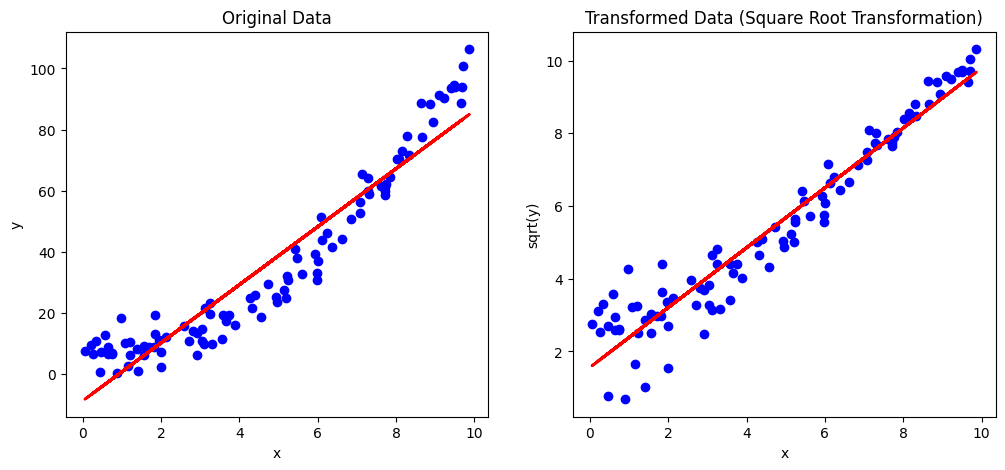

Original linear model
R-squared: 0.9008

Transformed linear model
R-squared: 0.9291


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate a non-linear dataset with a quadratic relationship
np.random.seed(42)
x = 10 * np.random.rand(100, 1)
y = x**2 + 5 + np.random.normal(0, 5, (100, 1))
y = np.abs(y)  # Ensure y is non-negative


# Apply square root transformation to y
y_sqrt = np.sqrt(y)

# Fit linear regression models for the original and transformed data
linear_model_original = LinearRegression()
linear_model_original.fit(x, y)
linear_model_transformed = LinearRegression()
linear_model_transformed.fit(x, y_sqrt)

# Predictions
y_pred_original = linear_model_original.predict(x)
y_pred_transformed = linear_model_transformed.predict(x)

# Visualize the relationship between x and y before and after transformation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before transformation
ax1.scatter(x, y, color='blue')
ax1.plot(x, y_pred_original, color='red', linewidth=2)
ax1.set_title('Original Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# After transformation
ax2.scatter(x, y_sqrt, color='blue')
ax2.plot(x, y_pred_transformed, color='red', linewidth=2)
ax2.set_title('Transformed Data (Square Root Transformation)')
ax2.set_xlabel('x')
ax2.set_ylabel('sqrt(y)')

plt.show()

# Calculate R-squared and Mean Squared Error
r2_original = r2_score(y, y_pred_original)
r2_transformed = r2_score(y_sqrt, y_pred_transformed)

# Compare the performance of the original and transformed models
print("Original linear model")
print(f"R-squared: {r2_original:.4f}")

print("\nTransformed linear model")
print(f"R-squared: {r2_transformed:.4f}")


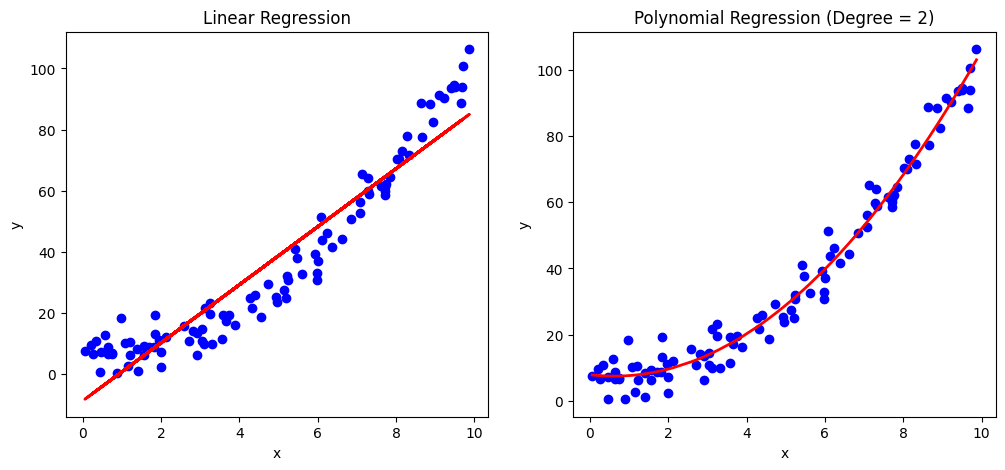

Linear regression
R-squared: 0.9008

Polynomial regression (degree = 2)
R-squared: 0.9782


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

# Generate a non-linear dataset with a quadratic relationship
np.random.seed(42)
x = 10 * np.random.rand(100, 1)
y = x**2 + 5 + np.random.normal(0, 5, (100, 1))
y = np.abs(y)  # Ensure y is non-negative

# Fit linear regression model
linear_model = LinearRegression()
linear_model.fit(x, y)
y_pred_linear = linear_model.predict(x)

# Fit polynomial regression model (degree = 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
poly_model = LinearRegression()
poly_model.fit(x_poly, y)
y_pred_poly = poly_model.predict(x_poly)

# Visualize the fitted lines for linear and polynomial regression
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Linear regression
ax1.scatter(x, y, color='blue')
ax1.plot(x, y_pred_linear, color='red', linewidth=2)
ax1.set_title('Linear Regression')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Polynomial regression
ax2.scatter(x, y, color='blue')
ax2.plot(sorted(x[:, 0]), y_pred_poly[np.argsort(x[:, 0])], color='red', linewidth=2)
ax2.set_title('Polynomial Regression (Degree = 2)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.show()

# Calculate R-squared for both models
r2_linear = r2_score(y, y_pred_linear)
r2_poly = r2_score(y, y_pred_poly)

# Compare the performance of the linear and polynomial regression models
print("Linear regression")
print(f"R-squared: {r2_linear:.4f}")

print("\nPolynomial regression (degree = 2)")
print(f"R-squared: {r2_poly:.4f}")


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(42)
x=np.random.rand(100,1)
y = 3 * x + np.random.normal(0, 0.3, (100, 1))

model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
residuals=y-y_pred


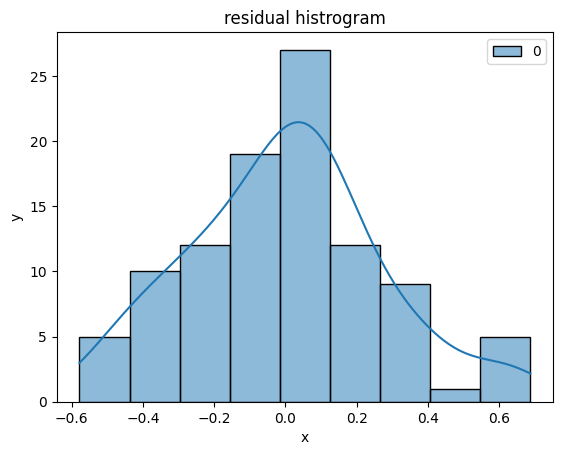

In [18]:
plt.Figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title("residual histrogram")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

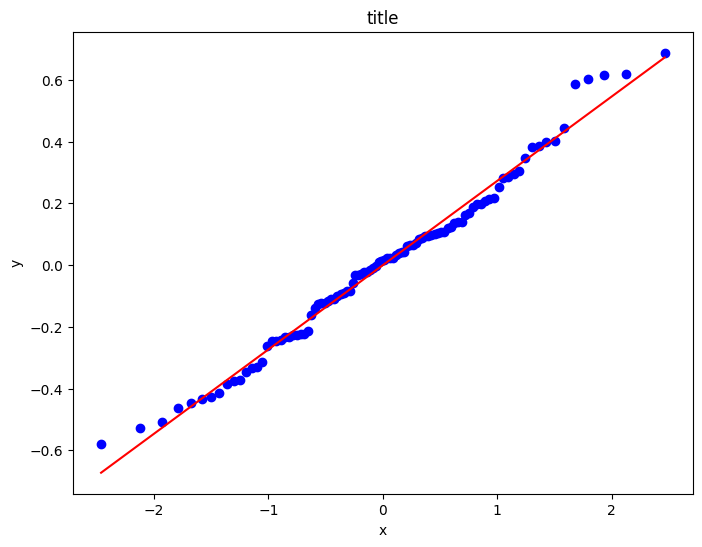

In [19]:
from scipy import stats
plt.figure(figsize=(8,6))
stats.probplot(residuals.flatten(),plot=plt)
plt.title("title")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [22]:
mean_residuals=np.mean(residuals)
print(f"mean_residuals={mean_residuals:.4f}")

mean_residuals=0.0000


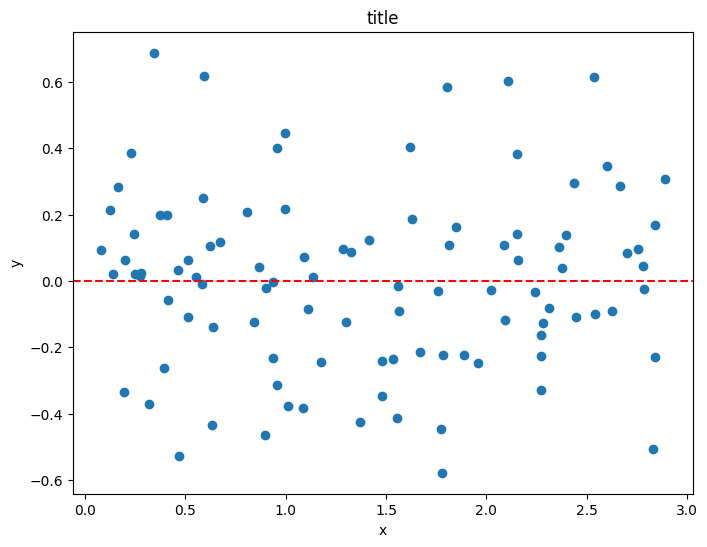

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(y_pred,residuals)
plt.axhline(y=0,color='r',linestyle='--')
plt.title("title")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

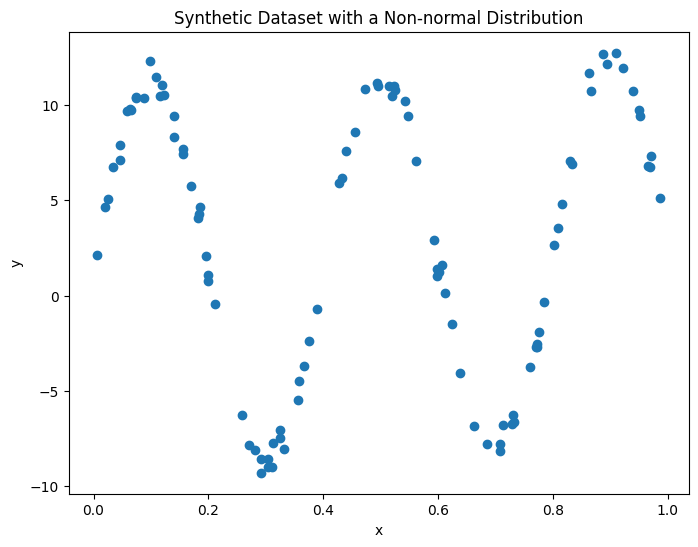

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# Generate a synthetic dataset with a non-normal distribution
x = np.random.rand(100, 1)
y = np.exp(x) + 10*np.sin(5*np.pi*x) + np.random.normal(0, 0.5, (100, 1))

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Dataset with a Non-normal Distribution')
plt.show()

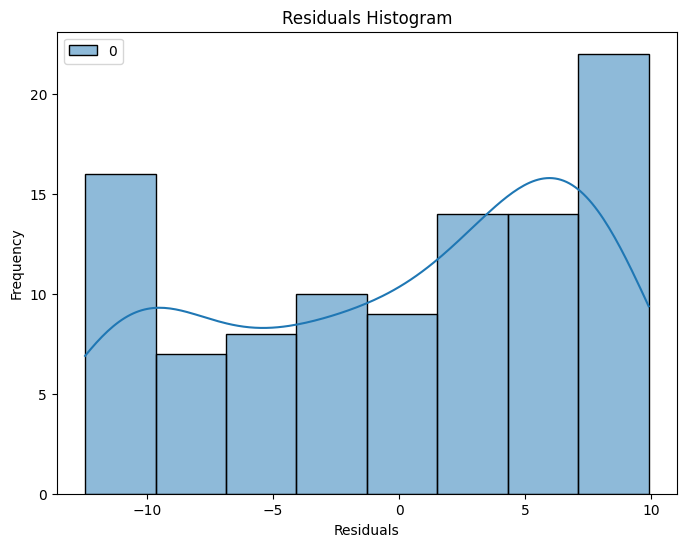

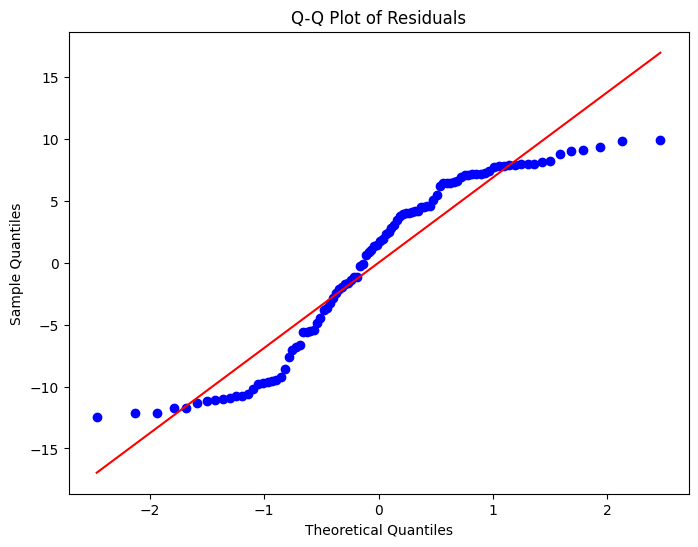

In [25]:
# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Calculate the residuals (error terms)
residuals = y - y_pred

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
from scipy import stats

plt.figure(figsize=(8, 6))
stats.probplot(residuals.flatten(), plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [26]:
mean_residuals = np.mean(residuals)
print(f"Mean of residuals: {mean_residuals:.4f}")

Mean of residuals: -0.0000


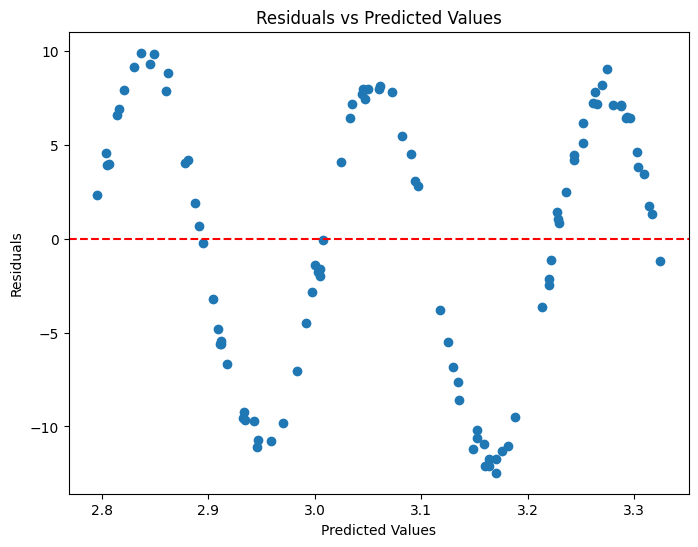

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [29]:
np.random.seed(42)
x=np.random.rand(100,1)
y = 3 * x + np.random.normal(0, 0.3, (100, 1))
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
residuals=y-y_pred
skewness=stats.skew(residuals)
kurtosis=stats.kurtosis(residuals)
omnibus_stat,omnibus_p_value=stats.normaltest(residuals)

print(f"Skewness: {skewness[0]:.4f}")
print(f"Kurtosis: {kurtosis[0]:.4f}")
print(f"Omnibus test statistic: {omnibus_stat[0]:.4f}")
print(f"Omnibus test p-value: {omnibus_p_value[0]:.4f}")

Skewness: 0.2173
Kurtosis: -0.0712
Omnibus test statistic: 0.9002
Omnibus test p-value: 0.6376


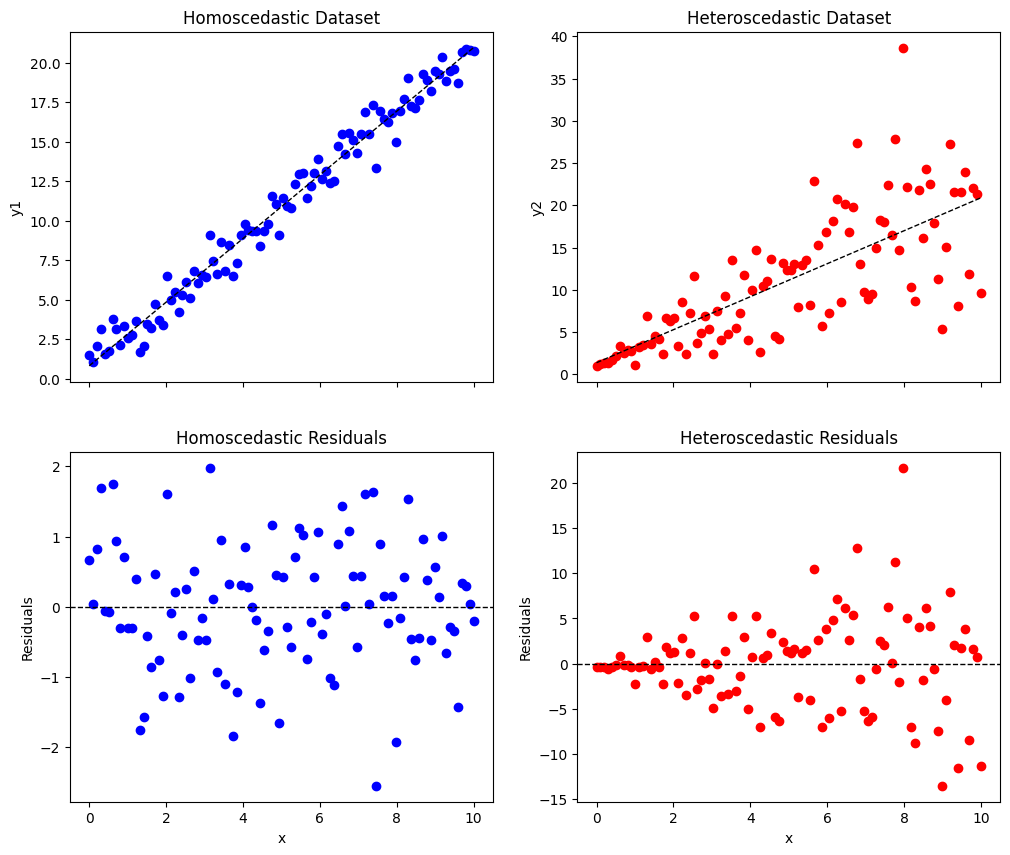

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate data
x = np.linspace(0, 10, 100)

# Homoscedastic dataset
y1 = 2 * x + 1 + np.random.normal(0, 1, len(x))

# Heteroscedastic dataset
y2 = 2 * x + 1 + np.random.normal(0, x, len(x))

# Fit linear models
coeffs1 = np.polyfit(x, y1, 1)
y1_pred = np.polyval(coeffs1, x)
residuals1 = y1 - y1_pred

coeffs2 = np.polyfit(x, y2, 1)
y2_pred = np.polyval(coeffs2, x)
residuals2 = y2 - y2_pred

# Plot datasets and residuals
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True)

# Plot dataset 1
axes[0, 0].scatter(x, y1, color='blue')
axes[0, 0].plot(x, y1_pred, color='black', linestyle='--', lw=1)
axes[0, 0].set_title('Homoscedastic Dataset')
axes[0, 0].set_ylabel('y1')

# Plot dataset 2
axes[0, 1].scatter(x, y2, color='red')
axes[0, 1].plot(x, y2_pred, color='black', linestyle='--', lw=1)
axes[0, 1].set_title('Heteroscedastic Dataset')
axes[0, 1].set_ylabel('y2')

# Plot residuals for dataset 1
axes[1, 0].scatter(x, residuals1, color='blue')
axes[1, 0].axhline(0, color='black', linestyle='--', lw=1)
axes[1, 0].set_title('Homoscedastic Residuals')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('Residuals')

# Plot residuals for dataset 2
axes[1, 1].scatter(x, residuals2, color='red')
axes[1, 1].axhline(0, color='black', linestyle='--', lw=1)
axes[1, 1].set_title('Heteroscedastic Residuals')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('Residuals')

plt.show()


In [31]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan


# Fit linear models
x_with_constant1 = sm.add_constant(x)
model1 = sm.OLS(y1, x_with_constant1).fit()

x_with_constant2 = sm.add_constant(x)
model2 = sm.OLS(y2, x_with_constant2).fit()

# Perform Breusch-Pagan test
bp_test1 = het_breuschpagan(model1.resid, x_with_constant1)
bp_test2 = het_breuschpagan(model2.resid, x_with_constant2)

print("Homoscedastic dataset - Breusch-Pagan test results:")
print(f"LM Statistic: {bp_test1[0]}\nLM-Test p-value: {bp_test1[1]}\nF-Statistic: {bp_test1[2]}\nF-Test p-value: {bp_test1[3]}\n")

print("Heteroscedastic dataset - Breusch-Pagan test results:")
print(f"LM Statistic: {bp_test2[0]}\nLM-Test p-value: {bp_test2[1]}\nF-Statistic: {bp_test2[2]}\nF-Test p-value: {bp_test2[3]}")


Homoscedastic dataset - Breusch-Pagan test results:
LM Statistic: 0.2728976751265044
LM-Test p-value: 0.6013945776291403
F-Statistic: 0.2681715555644599
F-Test p-value: 0.6057280388642077

Heteroscedastic dataset - Breusch-Pagan test results:
LM Statistic: 13.074070036062679
LM-Test p-value: 0.0002994118347711723
F-Statistic: 14.739662423694453
F-Test p-value: 0.0002188273543354366


OLS Model Summary
------------------
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     35.17
Date:                Thu, 07 Aug 2025   Prob (F-statistic):           4.55e-08
Time:                        01:36:57   Log-Likelihood:                -363.82
No. Observations:                 100   AIC:                             731.6
Df Residuals:                      98   BIC:                             736.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         1

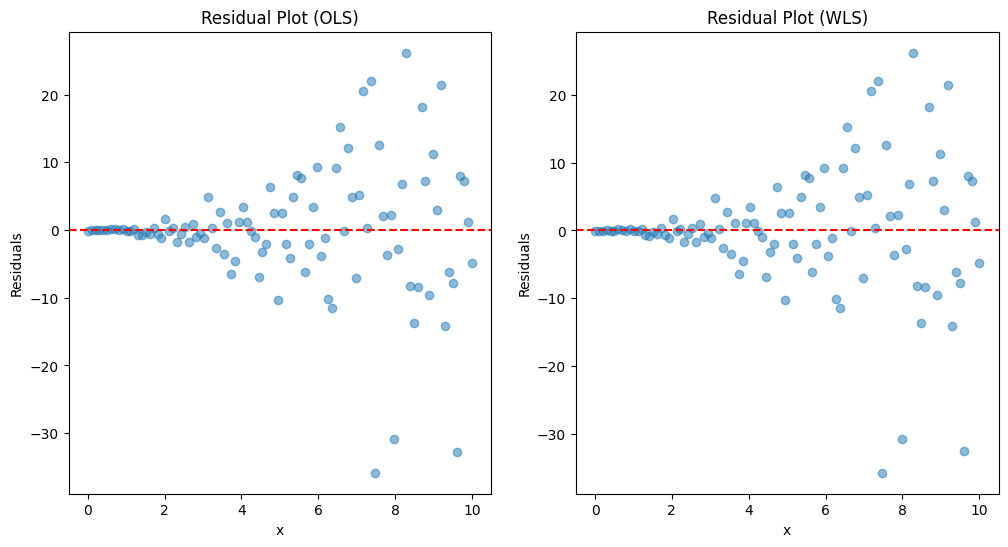

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data with more pronounced heteroscedasticity
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(0, (0.5 * x) ** 2, len(x))

# Scale the independent variables
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x.reshape(-1, 1))

# Add a constant term to the scaled independent variable
x_scaled_with_constant = sm.add_constant(x_scaled)

# Fit an OLS model
model_ols = sm.OLS(y, x_scaled_with_constant).fit()

# Calculate the squared residuals
squared_residuals = model_ols.resid**2

# Use the squared residuals with a small constant added as the weights for WLS
weights = 1 / (squared_residuals + 1e-6)

# Fit a WLS model using the estimated weights
model_wls = sm.WLS(y, x_scaled_with_constant, weights=weights).fit()

# Print the model summaries
print("OLS Model Summary")
print("------------------")
print(model_ols.summary())
print("\nWLS Model Summary")
print("------------------")
print(model_wls.summary())

# Plot the residual plots for OLS and WLS
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(x, model_ols.resid, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Residual Plot (OLS)')

plt.subplot(1, 2, 2)
plt.scatter(x, model_wls.resid, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Residual Plot (WLS)')

plt.show()


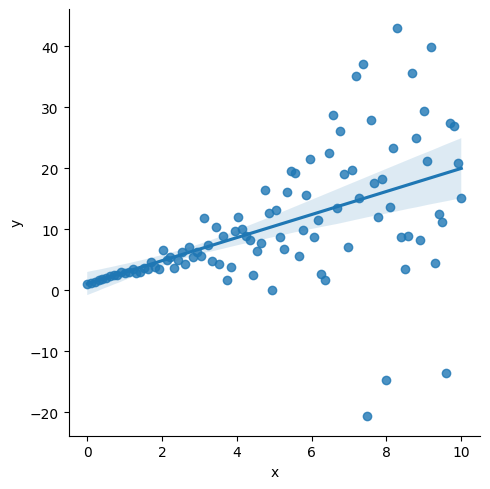

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data with more pronounced heteroscedasticity
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(0, (0.5 * x) ** 2, len(x))

# Create a DataFrame with the generated data
data = {'x': x, 'y': y}
df = pd.DataFrame(data)

# Plot the lmplot with confidence intervals
sns.lmplot(x='x', y='y', data=df, ci=95)
plt.show()